### System

The total Hamiltonian of the system is given by:

$
H = H_0 + H_{\text{SB}} = H_{\text{S}} + H_{\text{B}} + H_{\text{SB}}
$

where:
- $ H_{\text{S}} $ is the system Hamiltonian
- $ H_{\text{B}} $ is the bath Hamiltonian
- $ H_{\text{SB}} $ is the system-bath interaction Hamiltonian

#### System Hamiltonian

The system Hamiltonian $ H_{\text{S}} $ is modeled as a two level system:

$
H_{\text{S}} = \hbar \omega_a |e\rangle\langle e|
$

is defined by a two level system with ground state $ |g\rangle $, seperated from an excited state $ |e\rangle $ by $ \omega_at $.
The atom is polarized in the z direction


### The Coupling to the Environment is modeled with 
#### The Redfield Equation

... derivation from paper / Danis darivation...


The system-bath coupling is written in a general form as:

$
H_{SB} =  \sum_i S_i \otimes B_i,
$

where the coupling operators $ S_i $  are modeled as $ \sigma_z $ for dephasing and $ \sigma_x $ for relaxation.
and the different baths are uncorrelated. The correlation functions thus can be written as: 

$
C_{ij}(t) \equiv \langle B_i(t) B_j \rangle_B \equiv \delta_{ij} \langle B_i(t) B_j \equiv C_i(t)
$

Each System operator couples to its own bath.

**The SB interaction is treated within a linear response theory**: The monomers are linearly coupled to the bath oscillators and the coupling function $ F_i $ is specified as:

$
B_i = \sum_x g_x^i q_x^i =\sum_x g_x^i (a_x^{\dagger} + a_x) 
$

where the coupling parameter $ g_x^i $ describe the interaction of the system operator with mode $ x $ of the $ i-th $ bath.

For a bath of harmonic oscillators, analytic expressions for the bath correlation function (CF) and its Fourier transform can be obtained:

$
C_i(t) = \frac{1}{2} \sum_x (g_x^{(i)})^2 \left[ n(\omega_x) e^{i\omega_x t} + (1 + n(\omega_x)) e^{-i\omega_x t} \right],
$

where $ n(\omega) = 1 / (e^{\hbar\omega/k_B T} - 1) $ is the Bose-Einstein distribution function.

The spectral density function, $ J_i(\omega) $, which entirely describes the parameters of the bath, is defined for each monomer as:

$
J_i(\omega) = \frac{\pi}{2} \sum_x (g_x^{(i)})^2 \delta(\omega - \omega_x).
$

For convenience, we assume that the spectral density for both monomers is equivalent. For the calculations in this paper, the spectral density is taken to be of the form:

$
J(\omega) = g^2 \frac{\omega}{\omega_{\text{c}}} e^{-\omega/\omega_{\text{c}}},
$

where $ \omega_{\text{c}} $ is a cutoff frequency and $ g^2 $ is a dimensionless coupling strength parameter.


In [ ]:
### IMPORTS ###
from bath_constants import (
    Boltzmann,
    hbar,
    ############## Bath parameters ##############
)
# functions from test_baths.py
from test_baths import (
    spectral_density_func_ohmic,
    spectral_density_func_drude_lorentz,
)
import matplotlib.pyplot as plt
from qutip import *
import numpy as np

# Import the outsourced plot settings
from plot_settings import *

/home/leopold/PycharmProjects/Master_thesis/.venv/lib/python3.12/site-packages/qutip/utilities.py:53: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)


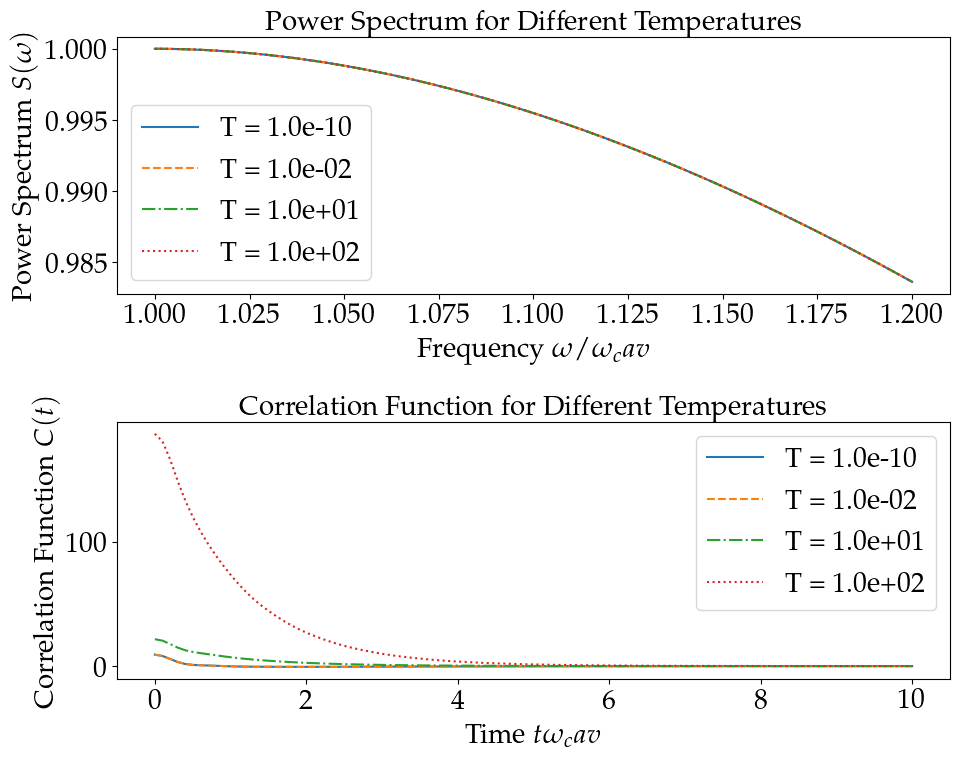

In [123]:
# =============================
# PLOT BATH MODEL OVER FREQUENCIES AND TIMES
# =============================
temperatures = [1e-10, 1e-2, 1e1, 1e2]
num_points   = 100
frequencies  = np.linspace(1 * cutoff, 1.2 * cutoff, num_points)  # Frequency range for the plot
times        = np.linspace(0, 10 / cutoff, num_points)   # Time range for the plot

plt.figure(figsize=(10, 8))

### Plot power spectrum
plt.subplot(2, 1, 1)
for Temp in temperatures:
    # Update the bath model for the current temperature
    env = BosonicEnvironment.from_spectral_density(
        lambda w: spectral_density_func_drude_lorentz(w, {"lambda": eta, "cutoff": cutoff, "s": 1.0}),
        wMax=10 * cutoff,
        T=Temp
    )
    plt.plot(
        frequencies / cutoff,
        [env.spectral_density(w) for w in frequencies],
        label=f"T = {Temp:.1e}",
        linestyle=['solid', 'dashed', 'dashdot', 'dotted'][temperatures.index(Temp) % 4],
        color=f'C{temperatures.index(Temp)}'
    )
plt.xlabel(r'Frequency $\omega / \omega_cav$')
plt.ylabel(r'Power Spectrum $S(\omega)$')
plt.title(r"Power Spectrum for Different Temperatures")
plt.legend()

### Plot correlation function
plt.subplot(2, 1, 2)
for Temp in temperatures:
    # Update the bath model for the current temperature
    env = BosonicEnvironment.from_spectral_density(
        lambda w: spectral_density_func_drude_lorentz(w, {"lambda": eta, "cutoff": cutoff, "s": 1.0}),
        wMax=10 * cutoff,
        T=Temp
    )
    plt.plot(
        times * cutoff,
        [env.correlation_function(t) for t in times],
        label=f"T = {Temp:.1e}",
        linestyle=['solid', 'dashed', 'dashdot', 'dotted'][temperatures.index(Temp) % 4],
        color=f'C{temperatures.index(Temp)}'
    )
plt.xlabel(r'Time $t \omega_cav$')
plt.ylabel(r'Correlation Function $C(t)$')
plt.title(r"Correlation Function for Different Temperatures")
plt.legend()

plt.tight_layout()
plt.show()

In [125]:
# =============================
# SYSTEM PARAMETERS     (**changeable**) 
# =============================
global Bath, omega_at, mu_at, rabi_0, delta, w_th, N_cav, N_at, omega_cav, g_at_cav, RWA_at_cav, gamma_0_cav, gamma_0_at, gamma_phi, omega_L_at, omega_L_cav

omega_at = 1 * 2 * np.pi  # energy separation of the atomic states
mu_at    = .1 * omega_at   # dipole moment of the transition
N_cav   = 0              # 0 = no cavity present or even = cavity with N_cav levels
N_at    = 2              # 0 lvls = atom is not present or 2 lvls = atom is present
Temp    = 1e2            # Temperature of the baths
w_th    = Boltzmann * Temp / hbar

omega_cav  = 1.0 * omega_at if N_cav != 0 else 0  # cavity energy separation
RWA_at_cav        = False # between atom and cavity
g_at_cav   = 0 * omega_at if N_cav != 0  else 0  # coupling strength between cavity and atom

g_at       = 0.0 * omega_at if N_at != 0  else 0  # coupling strength between cavity and atom
omega_L_at = 0.999 * omega_at

g_cav    = 0 * omega_cav if N_cav != 0  else 0  # coupling strength between cavity and atom
omega_L_cav = 0.99 * omega_cav


### Coupling to the bath
gamma_phi, gamma_0_at, gamma_0_cav = 1, 1, 0.01 #eta , eta / 3  # (**changeable**):  Dephasing and Decay rates
cutoff = 1e0 * omega_at # Adjust the cutoff frequency of the bath model based on the atomic frequency

def create_bath_model(eta, cutoff, Temp):
    """
    Create a bath model using the given parameters.

    Parameters:
    eta (float): Coupling strength to the bath.
    cutoff (float): Cutoff frequency of the bath model.
    Temp (float): Temperature of the system.

    Returns:
    bath_model: Spectral density of the bath.
    """
    args_ohmic = {"eta": eta, "cutoff": cutoff, "s": 1.0} # define bath parameters
    args_dl    = {"lambda": eta * cutoff / 2, "cutoff":cutoff} 
    bath_args  = args_dl

    env = BosonicEnvironment.from_spectral_density(
        lambda w: spectral_density_func_drude_lorentz(w, bath_args),# - spectral_density_func_ohmic(-w, bath_args),
        wMax=10 * cutoff,
        T=Temp
    )
    return env.spectral_density

# =============================
# DEFINE ATOMIC / CAVITY DECAY CHANNELS and observables to keep track of
# =============================
decay_ops_strg = ( # which decay channels are present
    "Relax_at" if N_at != 0 else "",  # Relaxation for the atom
#    "Relax_cav" if N_cav != 0 else "",  # Relaxation for the cavity
#    "Deph_at" if N_at != 0 else "",  # Dephasing for the atom
###    "Deph_cav" if N_cav != 0 else "",  # Dephasing for the cavity, usefull?
)

e_ops_strg = ( # which observables to keep track of
    # atomic observables
    "sx" if N_at != 0 else "",
    "sy" if N_at != 0 else "",
    "sz" if N_at != 0 else "",
    "n_at" if N_at != 0 else "",
    
    # cavity observables
    "n_cav" if N_cav != 0 else "",
    "a + a.dag()"if N_cav != 0 else "",
)


# =============================
# DEFINE ATOMIC / CAVITY STATES AND OPERATORS
# =============================
# atom
if N_at != 0:
    atom_g, atom_e = basis(N_at, 0), basis(N_at, 1)  # Ground, Excited states

    sm_op   = atom_g * atom_e.dag()
    dip_op  = mu_at * (sm_op + sm_op.dag())

    sx_op   = (sm_op + sm_op.dag())  # sigmaX operator
    sy_op   = -1j * (atom_e * atom_g.dag() - atom_g * atom_e.dag())  # sigmaY operator
    sz_op   = atom_e * atom_e.dag() - atom_g * atom_g.dag()  # sigmaZ operator
    n_at_op = ket2dm(atom_e)  # number operator for the atom
# Cavity
if N_cav != 0:
    a_op      = destroy(N_cav)  # cavity annihilation operator
    n_cav_op  = a_op.dag() * a_op  # number operator for the cavity

if N_at != 0 and N_cav != 0:
    # Combined operators
    A_op      = tensor(a_op, qeye(N_at)) if N_at != 0 else a_op
    SM_op     = tensor(qeye(N_cav), sm_op) if N_at != 0 else None
    SX_op     = tensor(qeye(N_cav), sx_op) if N_at != 0 else None
    SY_op     = tensor(qeye(N_cav), sy_op) if N_at != 0 else None
    SZ_op     = tensor(qeye(N_cav), sz_op) if N_at != 0 else None

    N_at_op   = tensor(qeye(N_cav), n_at_op) if N_at != 0 else None
    N_cav_op  = tensor(n_cav_op, qeye(N_at)) if N_at != 0 else n_cav_op
elif N_cav != 0 and N_at == 0:
    SM_op = SX_op = SY_op = SZ_op = N_at_op = None

    A_op = a_op
    N_cav_op = n_cav_op
elif N_at != 0 and N_cav == 0:
    N_cav_op = A_op = None
    
    SM_op = sm_op
    SX_op = sx_op
    SY_op = sy_op
    SZ_op = sz_op
    N_at_op = n_at_op

def Hamilton(omega_at, omega_cav, N_cav, N_at, g_at_cav, g_at, g_cav, RWA_at_cav):
    H_at  = 0
    H_cav = 0
    H_int = 0

    if N_at != 0:
        H_at = hbar * omega_at * SM_op.dag() * SM_op         # atom energy separation

    if N_cav != 0:
        H_cav += hbar * omega_cav * A_op.dag() * A_op  # cavity energy separation
    if g_at_cav != 0 and N_cav != 0 and N_at != 0:
        Rabi_0_at_cav = (mu_at * g_at_cav) / hbar
        if RWA_at_cav:
            H_int += hbar * Rabi_0_at_cav * (A_op + A_op.dag()) * (SM_op + SM_op.dag())  # interaction
        else:
            H_int += hbar * Rabi_0_at_cav * (A_op * SM_op.dag() + A_op.dag() * SM_op)  # interaction

    H0 = H_at + H_cav + H_int  # total Hamiltonian
    return H0


def plot_energy_levels(omega_at, omega_cav, N_cav, N_at, g_at_cav, RWA_at_cav):
    """
    Plots the energy levels as a function of cavity frequency.

    Parameters:
    omega_at : float
        Atomic frequency.
    omega_cav : float
        Cavity frequency.
    g_at_cav : float
        Coupling strength between atom and cavity.
    N_cav : int
        Number of cavity levels.
    N_at : int
        Number of atomic levels.
    RWA_at_cav : bool
        Rotating wave approximation flag.
    """
    # Generate a range of frequencies around omega_at
    frequencies = np.linspace(-0.1 * omega_at, 0.1 * omega_at, 101)

    # Calculate Hamiltonians for each frequency
    H_list = [Hamilton(omega_at, omega_cav, N_cav, N_at, g_at_cav, g_at, g_cav, RWA_at_cav) for wc in frequencies]

    # Calculate eigenenergies for each Hamiltonian
    eigenenergies = [H.eigenenergies() for H in H_list]

    # Plot the energy levels
    plt.figure(figsize=(5, 3))
    for i, energies in enumerate(zip(*eigenenergies)):
        plt.plot(frequencies / omega_at, np.array(energies) / omega_at,
                 label=f"Level {i+1}",
                 linestyle=['solid', 'dashed', 'dashdot', 'dotted'][i % 4],
                 color=f'C{i}')

    # Add labels and title
    plt.xlabel(r'Frequency $\omega_cav / \omega_at$')
    plt.ylabel(r'Energy $E / \omega_at$')
    plt.title(r"Energy Levels as a Function of $\omega_cav / \omega_at$")
    plt.legend()
    plt.tight_layout()
    plt.show()


def create_decay_ops_from_strg(strg):
    if N_at != 0:
        psi_ini_at = atom_e   # atom initially excited
        # psi_ini_at = (atom_e + atom_g).unit()   # initial state
    if N_cav != 0:
        #psi_ini_cav = basis(N_cav, 1) # initially one PHOTON present
        psi_ini_cav = (basis(N_cav, N_cav - 1) + basis(N_cav, N_cav - 2) + basis(N_cav, 0)).unit()
        
    a_ops_list = []
    c_ops_list = []
    gamma_brme = 0
    gamma_me = 0

    # unpack the string
    if "Deph_at" in strg:
        
        a_ops_list.append(
            [SZ_op, create_bath_model(gamma_phi, cutoff, Temp)]  # Dephasing operator
        )
        c_ops_list.append(
            np.sqrt(gamma_phi) * SZ_op  # Collapse operator for dephasing
        )

        gamma_brme = gamma_phi
        gamma_me = gamma_phi

    if "Relax_at" in strg:

        n_th = n_thermal(omega_at, w_th)

        def S_w(w):
            if w >= 0:
                return (n_th + 1) * gamma_0_at
            else:
                if w_th == 0:
                    return 0 
                return (n_th + 1) * gamma_0_at * np.exp(w / w_th)      

#        a_ops_list.append([
#            SM_op + SM_op.dag(), # hermitian Relaxation operator
#            lambda w: S_w(w)
#            ]
#        )
# TODO S_w(w) is not yet equal to the effect of  bath_model(w)
        a_ops_list.append([
            SM_op + SM_op.dag(), 
            create_bath_model(gamma_0_at, cutoff, Temp)]  # Relaxation operator
        )
        c_ops_list.append([
            SM_op.dag() * np.sqrt(gamma_0_at * n_th),  # Collapse operator for relaxation
            SM_op       * np.sqrt(gamma_0_at * (n_th) + 1)  # Collapse operator for relaxation
            ]
        )
        gamma_brme = gamma_0_at
        gamma_me = gamma_0_at

# THIS ONE REPRESENT THE SPONTANEOUS COUPLING between the atom and the cavity!! 
    if "Relax_cav" in strg:
        n_th = n_thermal(omega_cav, w_th)
        def S_w(w):
            if w >= 0:
                return (n_th + 1) * gamma_0_cav
            else:
                if w_th == 0:
                    return 0 
                return (n_th + 1) * gamma_0_cav * np.exp(w / w_th)      
    
#        a_ops_list.append([
#            (A_op + A_op.dag()),
#            lambda w : S_w(w)
#            ]
#        )

        a_ops_list.append([
            (A_op + A_op.dag()),
            create_bath_model(gamma_0_cav, cutoff, Temp)
            ]
        )        
        c_ops_list.append([
            A_op       * np.sqrt(gamma_0_cav * (n_th + 1)),
            A_op.dag() * np.sqrt(gamma_0_cav * (n_th)),
            ]
        )

        gamma_brme = gamma_0_cav
        gamma_me = gamma_0_cav
        
    if "Relax_at" in strg and "Deph_at" in strg:
        gamma_brme = (gamma_0_at + gamma_phi) / 2
        gamma_me = (gamma_0_at + gamma_phi) / 2
    
    if N_at != 0 and N_cav != 0:
        psi_ini = tensor(psi_ini_cav, psi_ini_at) if N_cav != 0 else psi_ini_at
    elif N_at != 0 and N_cav == 0:
        psi_ini = psi_ini_at
    elif N_cav != 0 and N_at == 0:
        psi_ini = psi_ini_cav

    return a_ops_list, c_ops_list, gamma_brme, gamma_me, psi_ini


def create_e_ops_from_strg(strg):
    e_ops_list = []
    e_ops_labels = []
    if "sx" in strg:
        e_ops_list.append(
            SX_op
        )
        e_ops_labels.append(
            r"$ \langle s_x \rangle $ "
        )

    if "sy" in strg:
        e_ops_list.append(
            SY_op
        )
        e_ops_labels.append(
            r"$ \langle s_y \rangle $ "
        )

    if "sz" in strg:
        e_ops_list.append(
            SZ_op
        )
        e_ops_labels.append(
            r"$ \langle s_z \rangle $ "
        )

    if "n_at" in strg:
        e_ops_list.append(
            N_at_op
        )
        e_ops_labels.append(
            r"$ \langle n_{\text{at}} \rangle $ "
        )
    if "n_cav" in strg:
        e_ops_list.append(
            N_cav_op
        )
        e_ops_labels.append(
            r"$ \langle n_{\text{cav}} \rangle $ "
        )
    if "a + a.dag()" in strg:
        e_ops_list.append(
            A_op + A_op.dag()
        )
        e_ops_labels.append(
            r"$ \langle A+A^\dagger \rangle $ "
        )

    return e_ops_list, e_ops_labels

H0 = Hamilton(omega_at, omega_cav, N_cav, N_at, g_at_cav, g_at, g_cav, RWA_at_cav)


H_total = [
    H0,
]


### Add classical laser interactions / drive
if g_at != 0:
    global Rabi_0_at
    delta_at = omega_at - omega_L_at
    Rabi_0_at = (mu_at * g_at) / hbar
    Rabi_at = np.sqrt(Rabi_0_at**2 + delta_at**2)

    def H_drive_coeff_at(t):
        return hbar * Rabi_0_at * np.cos(omega_L_at * t) # interaction with a classical field
    
    DIP_op = SM_op + SM_op.dag()  # This is σ_x
    H_total.append([- DIP_op, H_drive_coeff_at])

if g_cav != 0:
    def H_drive_coeff_cav(t):
        return - g_cav * np.cos(omega_L * t)          # interaction with a classical field

    delta_cav = omega_at - omega_L_cav
    mu_cav = 1
    Rabi_0_cav = (mu_cav * g_at) / hbar
    Rabi_cav = np.sqrt(Rabi_0_cav**2 + delta_cav**2)

    H_drive_op_cav = (A_op + A_op.dag())
    H_total.append([- H_drive_op_cav, H_drive_coeff_cav])

H_total = QobjEvo(H_total)

In [ ]:
a_ops_list, c_ops_list, gamma_br, gamma_me, psi_ini = create_decay_ops_from_strg(decay_ops_strg)

e_ops_list, e_ops_labels = create_e_ops_from_strg(e_ops_strg)

#print(a_ops_list, c_ops_list)
#print(gamma_br, gamma_me)


# for the HEOM solver:
envs = []
teminators = []

if "Relax_at" in decay_ops_strg:
    env_decay_at = DrudeLorentzBath(SX_op, lam=gamma_0_at * cutoff / 2, gamma=cutoff, T=Temp, Nk=Nk) # decay
    _, terminator_decay_at = env_decay_at.terminator()
    envs.append(env_decay_at)
    teminators.append(terminator_decay_at)
if "Deph_at" in decay_ops_strg:
    env_deph_at = DrudeLorentzBath(SZ_op, lam=gamma_phi * cutoff / 2, gamma=cutoff, T=Temp, Nk=Nk) # deph
    _, terminator_deph_at = env_deph_at.terminator()
    envs.append(env_deph_at)
    teminators.append(terminator_deph_at)
if "Relax_cav" in decay_ops_strg:
    env_decay_cav = DrudeLorentzBath((A_op), lam=gamma_0_cav * cutoff / 2, gamma=cutoff, T=Temp, Nk=Nk) # decay
    _, terminator_decay_cav = env_decay_cav.terminator()
    envs.append(env_decay_cav)
    teminators.append(terminator_decay_cav)

if teminators:
    total_terminator = sum(teminators)
    Ltot = liouvillian(H_total) + total_terminator
else:
    Ltot = liouvillian(H_total)

if envs:
    HEOM_dlbath = HEOMSolver(Ltot, envs, max_depth=max_depth, options=default_options)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]


In [110]:
### Not used anymore, just for testing
 
eta = gamma_0_at
max_depth = 5  # maximum hierarchy depth to retain


#Nk = 4
#env = DrudeLorentzBath(SM_op, gamma_0_at * cutoff / 2, cutoff, Temp, Nk)
#solver = HEOMSolver(H_total, env, max_depth=max_depth, options=default_options)


env = OhmicEnvironment(T=Temp, alpha=gamma_0_at, wc=cutoff, s=1)
# Fit the correlation function with three exponential terms
times_fit = np.linspace(0, 3 / cutoff, 100)
approx_env, info = env.approx_by_cf_fit(times_fit, target_rsme=None, Nr_max=6, Ni_max=6, maxfev=1e6) # potentially add a guess

plt.plot(times_fit, np.real(env.correlation_function(times_fit)), label='Real part (analytic)')
plt.plot(times_fit, np.real(approx_env.correlation_function(times_fit)), '--', label='Real part (fit)')

plt.plot(times_fit, np.imag(env.correlation_function(times_fit)), label='Imag part (analytic)')
plt.plot(times_fit, np.imag(approx_env.correlation_function(times_fit)), '--', label='Imag part (fit)')

plt.xlabel('Time')
plt.ylabel('Correlation function')
plt.tight_layout()
plt.legend()

KeyboardInterrupt: 

 Total run time:   0.58s*] Elapsed 0.58s / Remaining 00:00:00:00


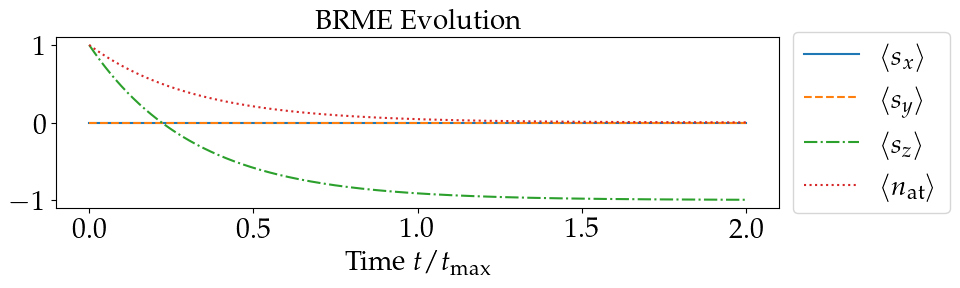

In [131]:
import contextlib
import time
from qutip.solver.heom import (
    DrudeLorentzBath,
    HEOMSolver,
    heomsolve,
)


def define_t_max():
    t_max = t_prd_at = t_prd_cav = t_half_at = t_half_cav = 0

### Determine characteristic times based on the setup
    if g_at != 0:
        t_prd_at = 2 * np.pi / Rabi_at # Period of atomic Rabi oscillations
    if g_cav != 0:
        t_prd_cav = 2 * np.pi / Rabi_cav # Period of cavity Rabi oscillations

    if "Relax_at" in decay_ops_strg:
        t_half_at = 1 / gamma_0_at # Half-life of atomic relaxation
    if "Relax_cav" in decay_ops_strg:
        t_half_cav = 1 / gamma_0_cav # Half-life of cavity relaxation

### Clear selection of t_max based on the setup
    non_zero_values = [val for val in [t_half_at, t_half_cav, t_prd_at, t_prd_cav] if val > 0]
    # print(non_zero_values)
    t_max = sum(non_zero_values) / len(non_zero_values) if non_zero_values else 0

    return t_max

t_max = define_t_max() if define_t_max() != 0 else 1


solver_strg = ( # which solvers to use
    "brme",
#    "me",
#   "heom"
)


### Define time arrays for evolution
times = np.linspace(0, 2 * t_max, 1000)

default_options = {
#    "store_states": True,
    "progress_bar": "enhanced",
#    "rtol": 1e-12,
#    "atol": 1e-12,
#    "nsteps": 1500, # ¿only? for heom?
#    "method": "vern9", # ¿only? for heom?
}

### Compute the evolution based on the selected cases
result_brme = result_me = result_heom = None

if "brme" in solver_strg:
    result_brme = brmesolve(
        H_total,
        psi_ini,
        times,
        e_ops=e_ops_list,
        a_ops=a_ops_list,
        options=default_options,
    )

if "me" in solver_strg:
    result_me = mesolve(
        H_total,
        psi_ini,
        times,
        e_ops=e_ops_list,
        c_ops=c_ops_list,
        options=default_options,
    )

if "heom" in solver_strg:
    assert decay_ops_strg, "Error: 'decay_ops_strg' must not be empty. Please specify at least one decay channel."
    eta = gamma_0_at
    max_depth = 1  # maximum hierarchy depth to retain

    Nk = 4
    #env = DrudeLorentzBath(SM_op, gamma_0_at * cutoff / 2, cutoff, Temp, Nk)
    #solver = HEOMSolver(H_total, env, max_depth=max_depth, options=default_options)
    #result_heom = solver.run(ket2dm(psi_ini), times, e_ops=e_ops_list)
    #result_heom = heomsolve(
    #    H_total,
    #    (approx_env, SZ_op), # or list of (baths, coupling operators)
    #    max_depth, 
    #    ket2dm(psi_ini), 
    #    times,
    #    e_ops=e_ops_list,
    #)

    with timer("ODE solver time"):
        result_heom = HEOM_dlbath.run(
            ket2dm(psi_ini), 
            times,
            e_ops=e_ops_list,
        )

# =============================
# PLOT EVOLUTION
# =============================
plt.figure(figsize=(10, 8))

### Plot result_brme if applicable
if result_brme:
    plt.subplot(3, 1, 1)
    for i, e_op in enumerate(e_ops_list):
        plt.plot(
            np.array(result_brme.times) / t_max,
            result_brme.expect[i],
            label=e_ops_labels[i],
            linestyle=['solid', 'dashed', 'dashdot', 'dotted'][i % 4],  # Alternate line styles
            color=f'C{i}',  # Use distinct colors
        )
    plt.xlabel(r'Time $t / t_{\text{max}}$')
    plt.title(r'BRME Evolution')

### Plot result_me if applicable
if result_me:
    plt.subplot(3, 1, 2)
    for i, e_op in enumerate(e_ops_list):
        plt.plot(
            np.array(result_me.times) / t_max,
            result_me.expect[i],
            label=e_ops_labels[i],
            linestyle=['solid', 'dashed', 'dashdot', 'dotted'][i % 4],  # Alternate line styles
            color=f'C{i}',  # Use distinct colors
        )
    plt.xlabel(r'Time $t / t_{\text{max}}$')
    plt.title(r'ME Evolution')

### Plot result_me if applicable
if result_heom:
    plt.subplot(3, 1, 3)
    for i, e_op in enumerate(e_ops_list):
        plt.plot(
            np.array(result_heom.times) / t_max,
            (result_heom.expect[i]),
            label=e_ops_labels[i],
            linestyle=['solid', 'dashed', 'dashdot', 'dotted'][i % 4],  # Alternate line styles
            color=f'C{i}',  # Use distinct colors
        )
    plt.xlabel(r'Time $t / t_{\text{max}}$')
    plt.title(r'HEOM Evolution')

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [ ]:
rho1, rho2 = result_brme.states[-1], result_me.states[-1]
F = fidelity(rho1, rho2)
print(f"Fidelity: {F}")

RHS construction time: 0.0028336048126220703
 Total run time:   8.74s*] Elapsed 8.74s / Remaining 00:00:00:00
ODE solver time: 8.73764157295227


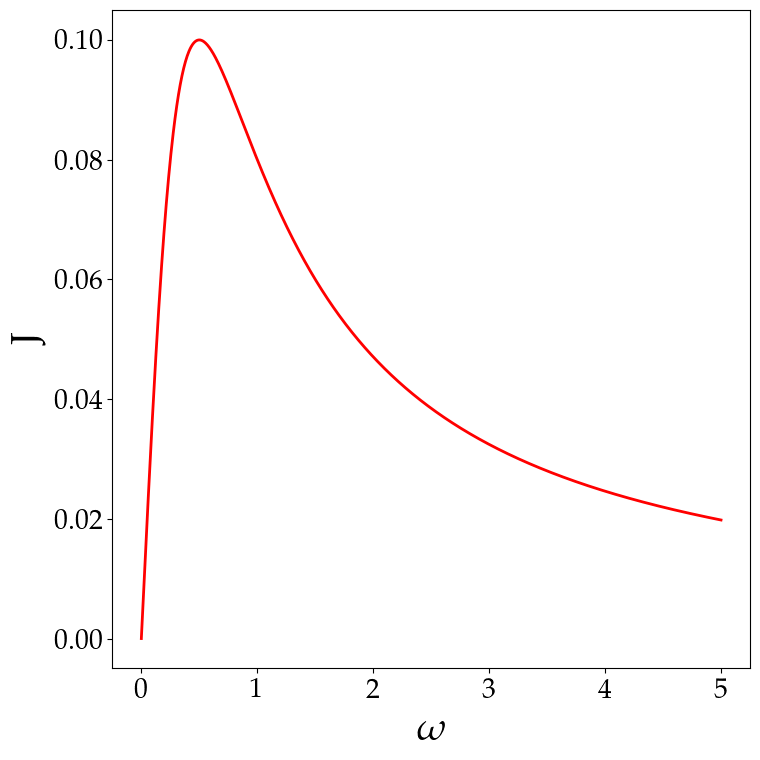

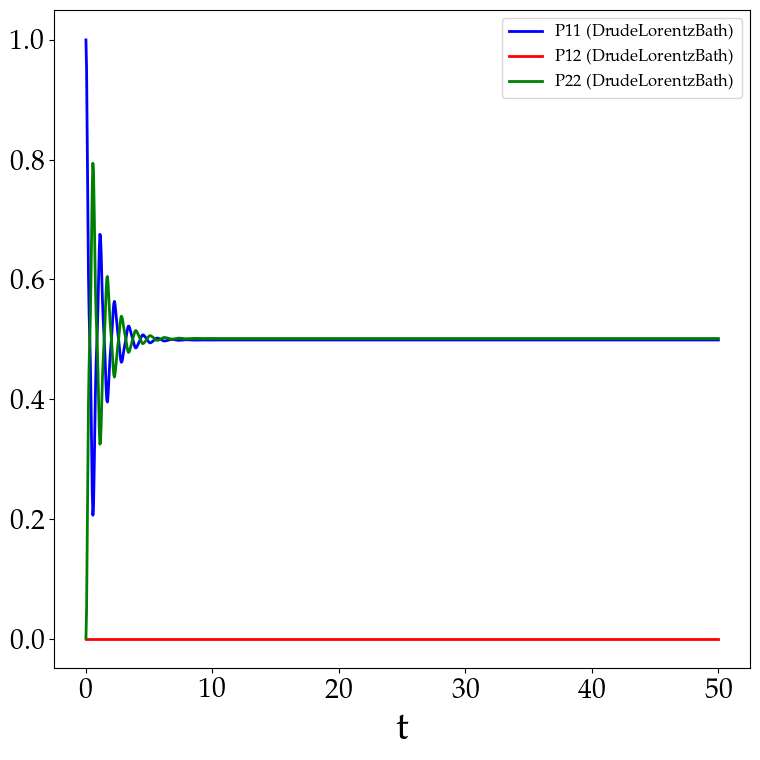

In [ ]:
import contextlib
import time

import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import qutip
from qutip import (
    basis,
    brmesolve,
    destroy,
    expect,
    liouvillian,
    qeye,
    sigmax,
    sigmaz,
    spost,
    spre,
    tensor,
)

from qutip.solver.heom import (
    BosonicBath,
    DrudeLorentzBath,
    DrudeLorentzPadeBath,
    HEOMSolver,
    HSolverDL,
)

%matplotlib inline


def cot(x):
    """Vectorized cotangent of x."""
    return 1.0 / np.tan(x)
def dl_matsubara_params(lam, gamma, T, nk):
    """Calculation of the real and imaginary expansions of the Drude-Lorenz
    correlation functions.
    """
    ckAR = [lam * gamma * cot(gamma / (2 * T))]
    ckAR.extend(
        4
        * lam
        * gamma
        * T
        * 2
        * np.pi
        * k
        * T
        / ((2 * np.pi * k * T) ** 2 - gamma**2)
        for k in range(1, nk + 1)
    )
    vkAR = [gamma]
    vkAR.extend(2 * np.pi * k * T for k in range(1, nk + 1))

    ckAI = [lam * gamma * (-1.0)]
    vkAI = [gamma]

    return ckAR, vkAR, ckAI, vkAI
def dl_corr_approx(t, nk):
    """Drude-Lorenz correlation function approximation.

    Approximates the correlation function at each time t to nk exponents.
    """
    c = lam * gamma * (-1.0j + cot(gamma / (2 * T))) * np.exp(-gamma * t)
    for k in range(1, nk):
        vk = 2 * np.pi * k * T
        c += (4 * lam * gamma * T * vk / (vk**2 - gamma**2)) * np.exp(
            -vk * t
        )
    return c
def plot_result_expectations(plots, axes=None):
    """Plot the expectation values of operators as functions of time.

    Each plot in plots consists of (solver_result, measurement_operation,
    color, label).
    """
    if axes is None:
        fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8, 8))
        fig_created = True
    else:
        fig = None
        fig_created = False

    # add kw arguments to each plot if missing
    plots = [p if len(p) == 5 else p + ({},) for p in plots]
    for result, m_op, color, label, kw in plots:
        exp = np.real(expect(result.states, m_op))
        kw.setdefault("linewidth", 2)
        axes.plot(result.times, exp, color, label=label, **kw)

    if fig_created:
        axes.legend(loc=0, fontsize=12)
        axes.set_xlabel("t", fontsize=28)

    return fig
@contextlib.contextmanager
def timer(label):
    """Simple utility for timing functions:

    with timer("name"):
        ... code to time ...
    """
    start = time.time()
    yield
    end = time.time()
    print(f"{label}: {end - start}")
# Default solver options:

default_options = {
    "nsteps": 1500,
    "store_states": True,
    "rtol": 1e-12,
    "atol": 1e-12,
    "method": "vern9",
    "progress_bar": "enhanced",
}


# Defining the system Hamiltonian
eps = 0.5  # Energy of the 2-level system.
Del = 1.0  # Tunnelling term
Hsys = 0.5 * eps * sigmaz()# + 0.5 * Del * sigmax()
# Initial state of the system.
rho0 = basis(2, 0) * basis(2, 0).dag()
# System-bath coupling (Drude-Lorentz spectral density)
Q = sigmax()  # coupling operator

# Bath properties:
gamma = 0.5  # cut off frequency
lam = 0.1  # coupling strength
T = 100
beta = 1.0 / T

# HEOM parameters
NC = 5  # cut off parameter for the bath
Nk = 2  # terms in the Matsubara expansion of the correlation function

# Times to solve for
tlist = np.linspace(0, 50, 1000)
# Define some operators with which we will measure the system
# 1,1 element of density matrix - corresonding to groundstate
P11p = basis(2, 0) * basis(2, 0).dag()
P22p = basis(2, 1) * basis(2, 1).dag()
# 1,2 element of density matrix  - corresonding to coherence
P12p = basis(2, 0) * basis(2, 1).dag()


def plot_spectral_density():
    """Plot the Drude-Lorentz spectral density"""
    w = np.linspace(0, 5, 1000)
    J = w * 2 * lam * gamma / (gamma**2 + w**2)

    fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8, 8))
    axes.plot(w, J, "r", linewidth=2)
    axes.set_xlabel(r"$\omega$", fontsize=28)
    axes.set_ylabel(r"J", fontsize=28)


plot_spectral_density()

options = {**default_options}

#In practice, one would not perform this laborious expansion for the Drude-Lorentz correlation function, because QuTiP already has a class, DrudeLorentzBath, that can construct this bath for you. Nevertheless, knowing how to perform this expansion will allow you to construct your own baths for other spectral densities.

#Below we show how to use this built-in functionality:

# Compare to built-in Drude-Lorentz bath:

with timer("RHS construction time"):
    bath = DrudeLorentzBath(Q, lam=lam, gamma=gamma, T=T, Nk=Nk)
    # HEOM_dlbath = HEOMSolver(Hsys, bath, NC, options=options)
    
    _, terminator = bath.terminator()
    Ltot = liouvillian(Hsys) + terminator
    HEOM_dlbath = HEOMSolver(Ltot, bath, NC, options=options)

with timer("ODE solver time"):
    result_dlbath = HEOM_dlbath.run(rho0, tlist)  # normal  115
plot_result_expectations(
    [
        (result_dlbath, P11p, "b", "P11 (DrudeLorentzBath)"),
        (result_dlbath, P12p, "r", "P12 (DrudeLorentzBath)"),
        (result_dlbath, P22p, "g", "P22 (DrudeLorentzBath)"),
    ]
);

RHS construction time: 0.0040547847747802734
 Total run time:   0.60s*] Elapsed 0.60s / Remaining 00:00:00:00
ODE solver time: 0.6040487289428711
RHS construction time: 0.0028760433197021484
 Total run time:   0.71s*] Elapsed 0.71s / Remaining 00:00:00:00
ODE solver time: 0.722916841506958


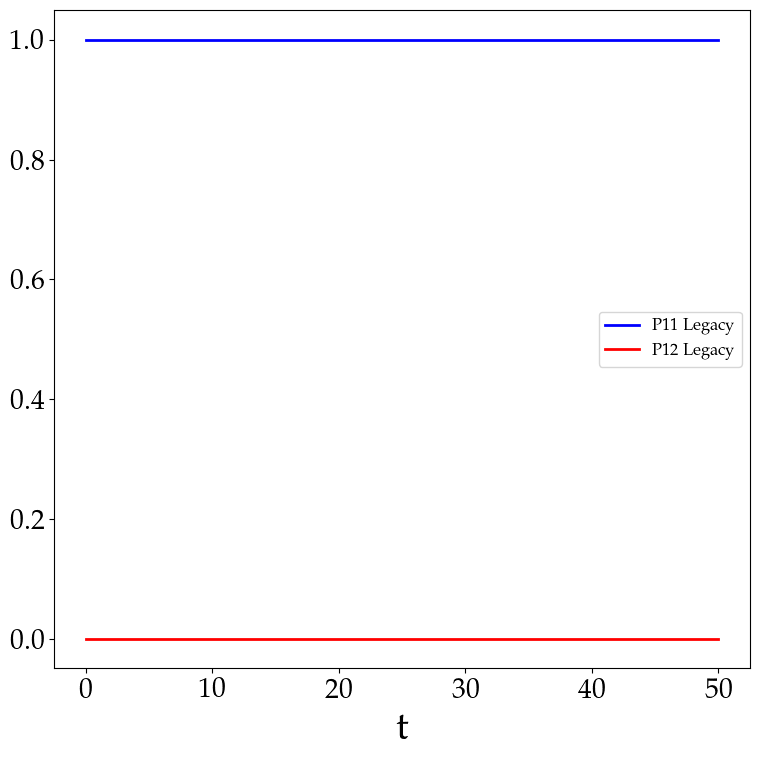

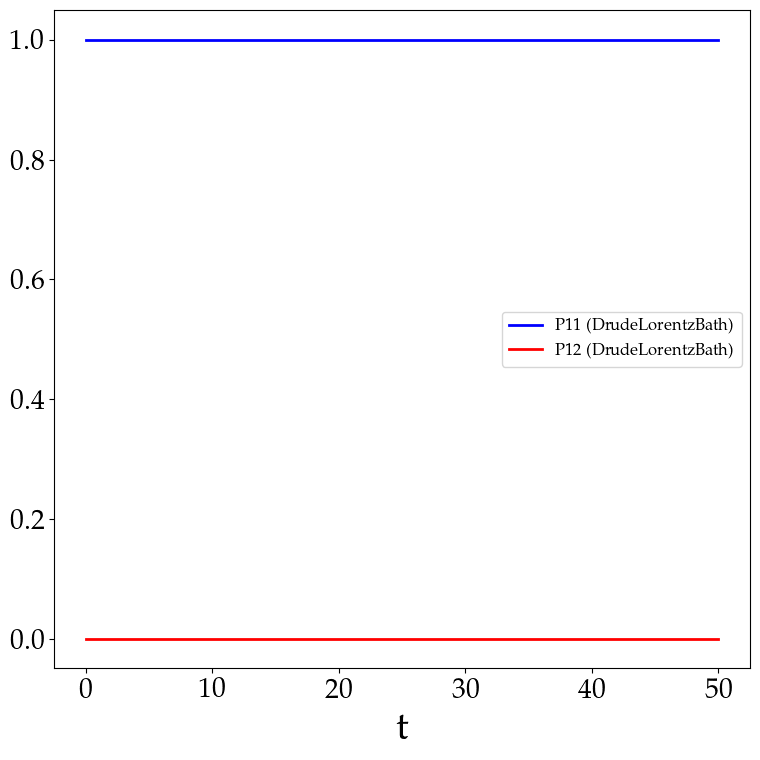

In [54]:
# Compare to legacy class:

# The legacy class performs the above collation of coefficients automatically,
# based upon the parameters for the Drude-Lorentz spectral density.

with timer("RHS construction time"):
    HEOMlegacy = HSolverDL(H0, Q, lam, T, NC, Nk, gamma, options=options)

with timer("ODE solver time"):
    resultLegacy = HEOMlegacy.run(rho0, tlist)  # normal  115

plot_result_expectations(
    [
        (resultLegacy, P11p, "b", "P11 Legacy"),
        (resultLegacy, P12p, "r", "P12 Legacy"),
    ]
);

# Compare to built-in Drude-Lorentz bath:

with timer("RHS construction time"):
    bath = DrudeLorentzBath(Q, lam=lam, gamma=gamma, T=T, Nk=Nk)
    HEOM_dlbath = HEOMSolver(H0, bath, NC, options=options)

with timer("ODE solver time"):
    result_dlbath = HEOM_dlbath.run(rho0, tlist)  # normal  115

    plot_result_expectations(
    [
        (result_dlbath, P11p, "b", "P11 (DrudeLorentzBath)"),
        (result_dlbath, P12p, "r", "P12 (DrudeLorentzBath)"),
    ]
);

RHS construction time: 0.0043354034423828125
 Total run time:   0.63s*] Elapsed 0.63s / Remaining 00:00:00:00
ODE solver time: 0.6264495849609375


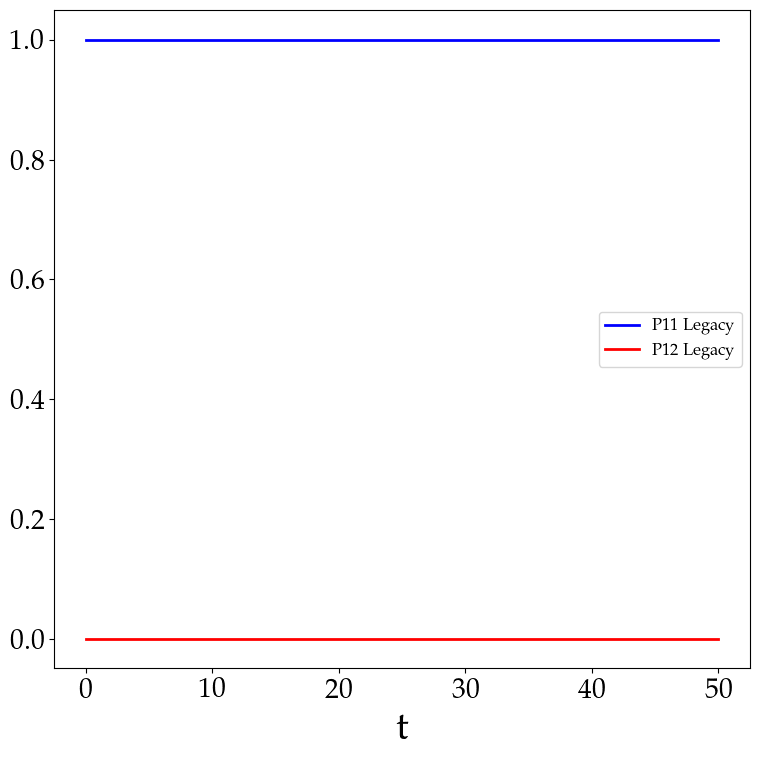

In [48]:
# Compare to legacy class:

# The legacy class performs the above collation of coefficients automatically,
# based upon the parameters for the Drude-Lorentz spectral density.

with timer("RHS construction time"):
    HEOMlegacy = HSolverDL(H0, Q, lam, T, NC, Nk, gamma, options=options)

with timer("ODE solver time"):
    resultLegacy = HEOMlegacy.run(rho0, tlist)  # normal  115

plot_result_expectations(
    [
        (resultLegacy, P11p, "b", "P11 Legacy"),
        (resultLegacy, P12p, "r", "P12 Legacy"),
    ]
);

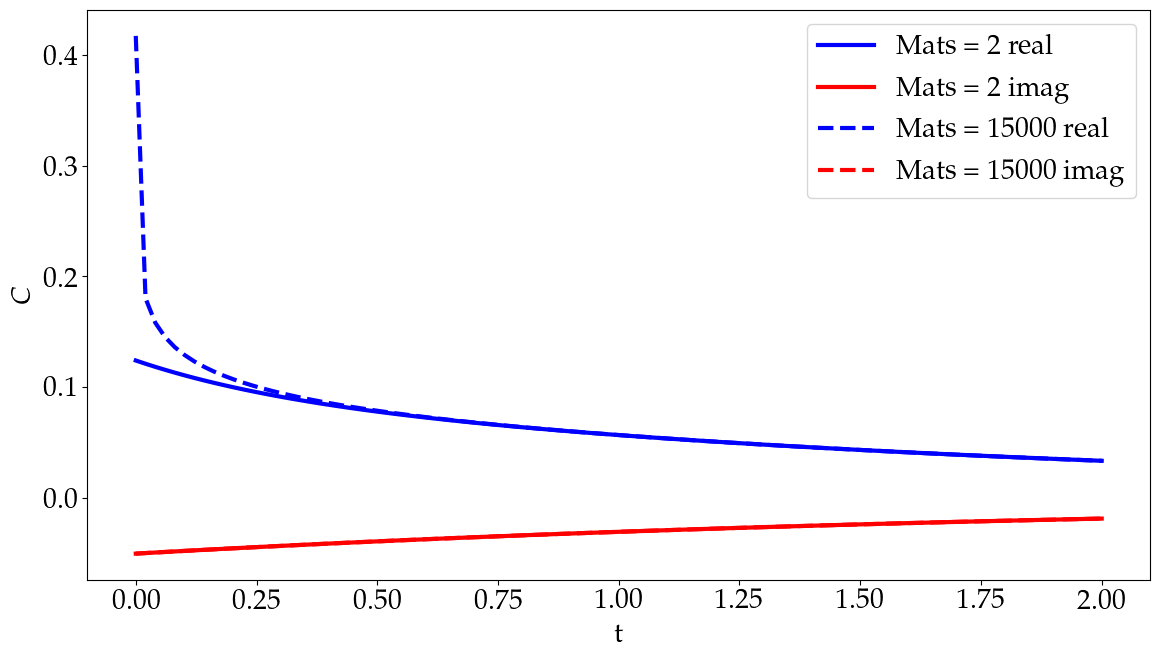

In [49]:
def plot_correlation_expansion_divergence():
    """We plot the correlation function with a large number of Matsubara terms
    to show that the real part is slowly diverging at t = 0.
    """
    t = np.linspace(0, 2, 100)

    # correlation coefficients with 15k and 2 terms
    corr_15k = dl_corr_approx(t, 15_000)
    corr_2 = dl_corr_approx(t, 2)

    fig, ax1 = plt.subplots(figsize=(12, 7))

    ax1.plot(
        t, np.real(corr_2), color="b", linewidth=3, label=r"Mats = 2 real"
    )
    ax1.plot(
        t, np.imag(corr_2), color="r", linewidth=3, label=r"Mats = 2 imag"
    )
    ax1.plot(
        t, np.real(corr_15k), "b--", linewidth=3, label=r"Mats = 15000 real"
    )
    ax1.plot(
        t, np.imag(corr_15k), "r--", linewidth=3, label=r"Mats = 15000 imag"
    )

    ax1.set_xlabel("t")
    ax1.set_ylabel(r"$C$")
    ax1.legend()


plot_correlation_expansion_divergence();

RHS construction time: 0.004031658172607422
 Total run time:   0.77s*] Elapsed 0.77s / Remaining 00:00:00:00
ODE solver time: 0.7719681262969971
RHS construction time: 0.0016601085662841797
 Total run time:   0.76s*] Elapsed 0.75s / Remaining 00:00:00:00
ODE solver time: 0.755469560623169
 Total run time:   0.66s*] Elapsed 0.66s / Remaining 00:00:00:00
ODE solver time: 0.6642694473266602


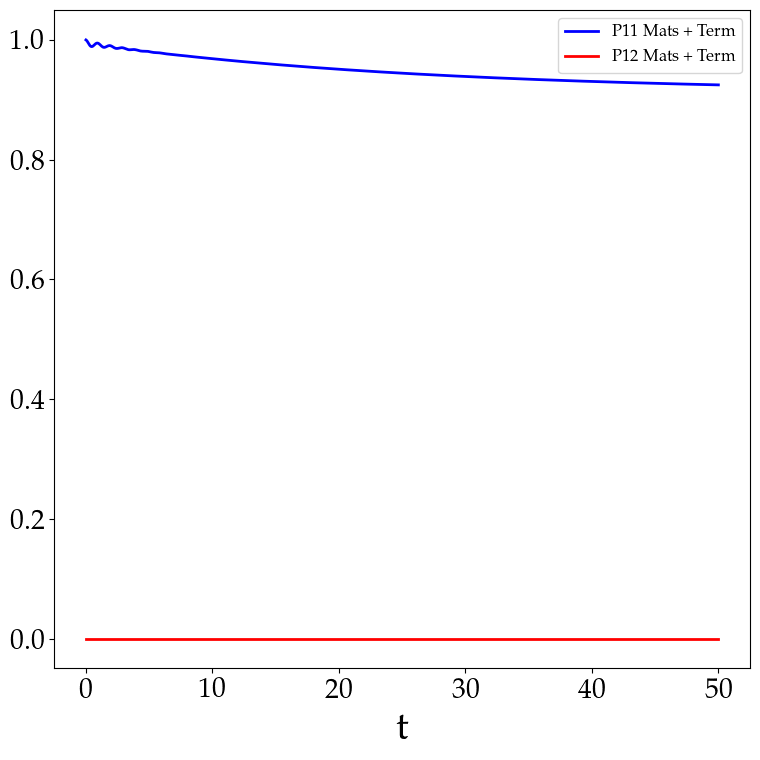

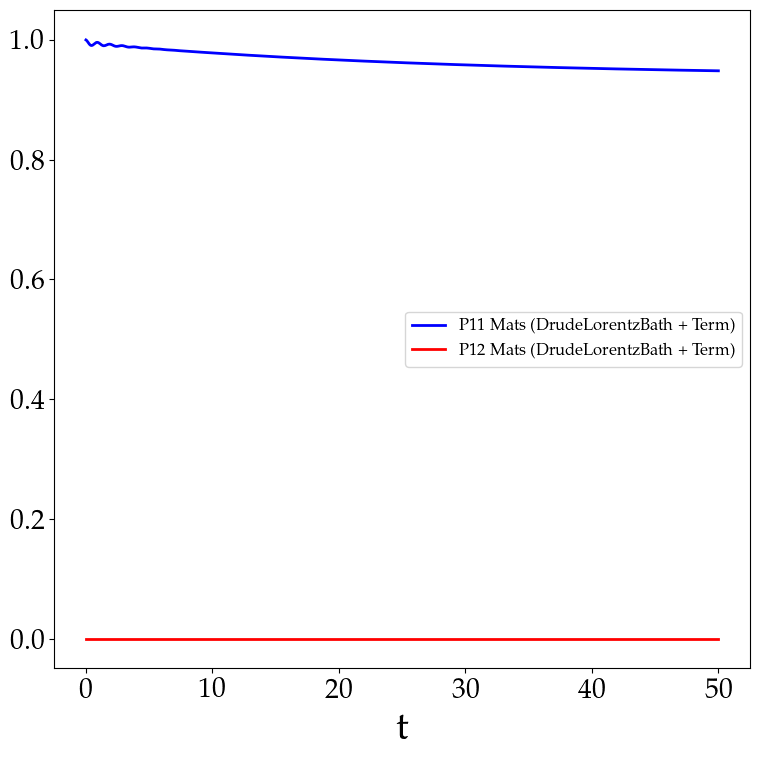

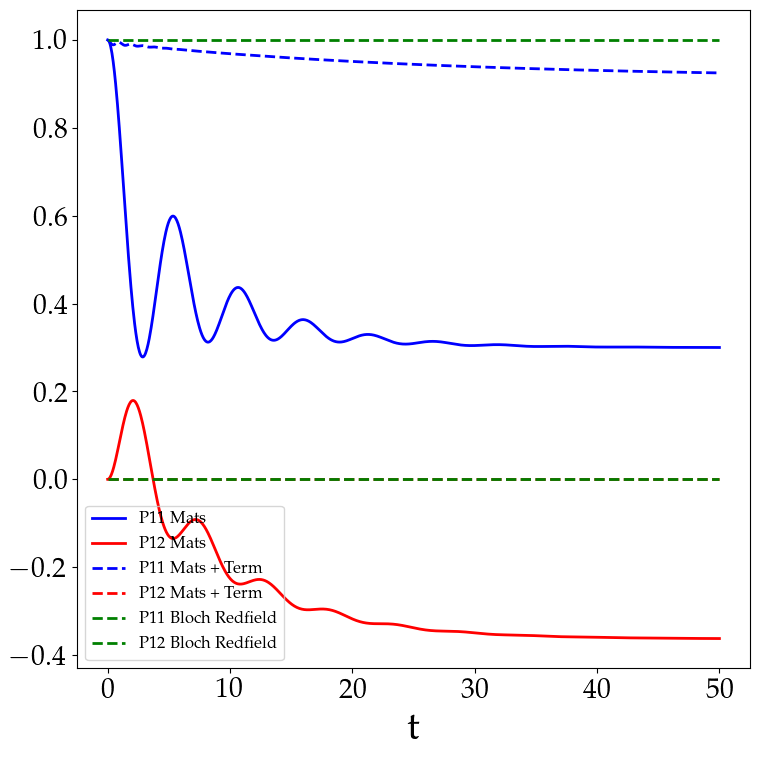

In [64]:
# Run HEOM solver and include the Ishizaki-Tanimura terminator

# Notes:
#
# * when using the built-in DrudeLorentzBath, the terminator (L_bnd) is
#   available from bath.terminator().
#
# * in the legacy HSolverDL function the terminator is included automatically
#   if the parameter bnd_cut_approx=True is used.

op = -2 * spre(Q) * spost(Q.dag()) + spre(Q.dag() * Q) + spost(Q.dag() * Q)

approx_factr = (2 * lam / (beta * gamma)) - 1j * lam

approx_factr -= lam * gamma * (-1.0j + cot(gamma / (2 * T))) / gamma
for k in range(1, Nk + 1):
    vk = 2 * np.pi * k * T

    approx_factr -= (4 * lam * gamma * T * vk / (vk**2 - gamma**2)) / vk

L_bnd = -approx_factr * op

Ltot = -1.0j * (spre(H0) - spost(H0)) + L_bnd
Ltot = liouvillian(H0) + L_bnd

options = {**default_options, "rtol": 1e-14, "atol": 1e-14}

with timer("RHS construction time"):
    bath = BosonicBath(Q, ckAR, vkAR, ckAI, vkAI)
    HEOMMatsT = HEOMSolver(Ltot, bath, NC, options=options)

with timer("ODE solver time"):
    resultMatsT = HEOMMatsT.run(rho0, tlist)

plot_result_expectations(
    [
        (resultMatsT, P11p, "b", "P11 Mats + Term"),
        (resultMatsT, P12p, "r", "P12 Mats + Term"),
    ]
);


options = {**default_options, "rtol": 1e-14, "atol": 1e-14}

with timer("RHS construction time"):
    bath = DrudeLorentzBath(Q, lam=lam, gamma=gamma, T=T, Nk=Nk)
    _, terminator = bath.terminator()
    Ltot = liouvillian(H0) + terminator
    HEOM_dlbath_T = HEOMSolver(Ltot, bath, NC, options=options)

with timer("ODE solver time"):
    result_dlbath_T = HEOM_dlbath_T.run(rho0, tlist)
plot_result_expectations(
    [
        (result_dlbath_T, P11p, "b", "P11 Mats (DrudeLorentzBath + Term)"),
        (result_dlbath_T, P12p, "r", "P12 Mats (DrudeLorentzBath + Term)"),
    ]
);


DL = (
    f"2*pi* 2.0 * {lam} / (pi * {gamma} * {beta}) if (w == 0) else "
    f"2*pi*(2.0*{lam}*{gamma} *w /(pi*(w**2+{gamma}**2))) "
    f"* ((1/(exp((w) * {beta})-1))+1)"
)
options = {**default_options}

with timer("ODE solver time"):
    resultBR = brmesolve(
        H0, rho0, tlist, a_ops=[[sigmaz(), DL]], options=options
    )


plot_result_expectations(
    [
        (resultMats, P11p, "b", "P11 Mats"),
        (resultMats, P12p, "r", "P12 Mats"),
        (resultMatsT, P11p, "b--", "P11 Mats + Term"),
        (resultMatsT, P12p, "r--", "P12 Mats + Term"),
        (resultBR, P11p, "g--", "P11 Bloch Redfield"),
        (resultBR, P12p, "g--", "P12 Bloch Redfield"),
    ]
);